In [117]:
import tensorflow as tf
import matplotlib
import seaborn 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


## 데이터 분포확인

In [88]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [89]:
print(f'훈련 샘플의 수: {len(x_train)}')
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


샘플수는 동일하지만 num_words=5000이기 때문에 5000 이후 인덱스는 unk로 채워짐 

In [23]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 단어길이 분포확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


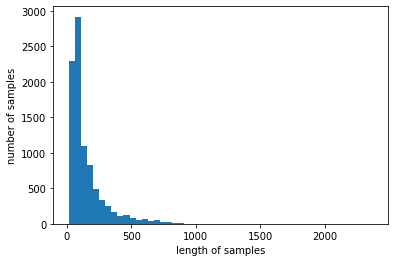

In [24]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### class 분포 확인

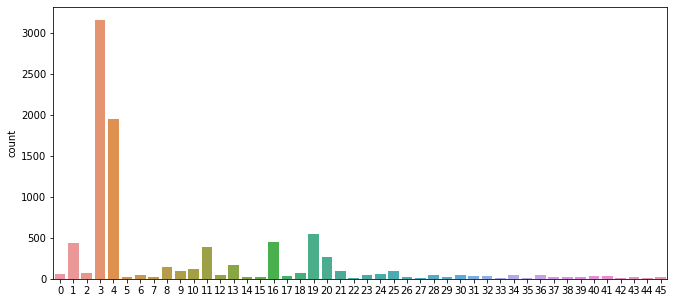

In [26]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

### 정수 시퀀스를 텍스트로 복원한 후, TF-IDF 벡터화하는 전처리 함수

In [76]:
def preprocess_text(x_train,x_test):
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    index_to_word = {index+3 : word for word, index in word_index.items()}
    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
      index_to_word[index]=token
    
    train_decoded = []
    for i in range(len(x_train)):
        t = ' '.join([index_to_word[index] for index in x_train[i]])
        train_decoded.append(t)

    x_train = train_decoded
    
    test_decoded = []
    for i in range(len(x_test)):
        t = ' '.join([index_to_word[index] for index in x_test[i]])
        test_decoded.append(t)

    x_test = test_decoded
    
    
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    x_test_dtm = dtmvector.transform(x_test)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

    return tfidfv, tfidfv_test

In [90]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

### F1-Scoer

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model 학습 및 테스트

In [ ]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [97]:
def logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test):
    # 모델 학습
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(tfidfv,y_train)
    # 모델 테스트
    predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    # 보고서 리턴
    return classification_report(y_test,predicted,zero_division=0)

In [98]:
def random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test):
    # 모델 학습
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    # 모델 테스트
    predicted = forest.predict(tfidfv_test)
    # 보고서 리턴
    return classification_report(y_test,predicted,zero_division=0)

## 단어 수 5000 | 1번째 실험 (Logistic Regrassion, Random Tree)

In [91]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.77      0.75       105
           2       0.76      0.80      0.78        20
           3       0.90      0.93      0.91       813
           4       0.80      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.66      0.71      0.68        38
           9       0.81      0.88      0.85        25
          10       0.89      0.83      0.86        30
          11       0.64      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.63      0.65      0.64        37
          14       0.50      0.50      0.50         2
          15       0.75      0.33      0.46         9
          16       0.70      0.75      0.73        99
          17       0.80    

In [69]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

| 모델 이름            | 단어 수 (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | 5,000                  | 0.80     | 0.80                     |
| Random Forest       | 5,000                  | 0.70     | 0.68                     |


## 인사이트
+ Random Forest보다 Logistic Regression이 정확도, F1-Score 두 가지 측면 모두에서 우수함을 보임

## 단어 수 10000 | 2번째 실험 (Logistic Regrassion, Random Tree)

In [113]:
# 단어 인덱스 로드
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 전체 단어 수 출력
print("로이터 뉴스 전체 단어 수:", len(word_index))

로이터 뉴스 전체 단어 수: 30979


In [74]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [77]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

In [83]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.78      0.76       105
           2       0.70      0.70      0.70        20
           3       0.91      0.93      0.92       813
           4       0.80      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.67      0.72      0.70        83
          12       0.62      0.38      0.48        13
          13       0.65      0.59      0.62        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.71      0.77      0.74        99
          17       0.80    

In [80]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

| 모델 이름            | 단어 수 (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | 10,000                 | 0.81     | 0.81                     |
| Random Forest       | 10,000                 | 0.67     | 0.64                     |


## 인사이트
+ 단어 수 10,000으로 늘렸을 때 Logistic Regression의 성능은 소폭 상승하였으나 Random Forest는 성능이 감소함

## 단어 수 15000 | 3번째 실험 (Logistic Regrassion, Random Tree)

In [94]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)

In [95]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

In [99]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.79      0.76       105
           2       0.78      0.70      0.74        20
           3       0.92      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.71      0.71      0.71        38
           9       0.85      0.88      0.86        25
          10       0.93      0.87      0.90        30
          11       0.68      0.72      0.70        83
          12       0.62      0.38      0.48        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.70      0.77      0.73        99
          17       0.82    

In [101]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33        12
           1       0.42      0.69      0.52       105
           2       0.13      0.10      0.11        20
           3       0.81      0.90      0.85       813
           4       0.65      0.85      0.74       474
           5       0.00      0.00      0.00         5
           6       0.83      0.36      0.50        14
           7       0.50      0.67      0.57         3
           8       0.62      0.53      0.57        38
           9       0.71      0.40      0.51        25
          10       0.60      0.20      0.30        30
          11       0.45      0.51      0.47        83
          12       0.60      0.23      0.33        13
          13       0.40      0.22      0.28        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.55      0.46      0.50        99
          17       0.00    

| 모델 이름            | 단어 수 (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | 15,000                 | 0.81     | 0.81                     |
| Random Forest       | 15,000                 | 0.67     | 0.64                     |


### 인사이트
+ 10000개의 단어를 사용했을 때와 성능차이가 없음
+ 가중치를 두지않는 macro avg는 약간의 감소가 나타남

## 단어 수 None(제한 없음) | 4번째 실험 (Logistic Regrassion, Random Tree)

In [105]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [106]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

In [107]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.78      0.70      0.74        20
           3       0.92      0.93      0.93       813
           4       0.81      0.88      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.85      0.88      0.86        25
          10       0.93      0.90      0.92        30
          11       0.67      0.72      0.69        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.71      0.77      0.74        99
          17       0.82    

In [108]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.46      0.52        99
          17       0.00    

| 모델 이름            | 단어 수 (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | None(30,979)                 | 0.82     | 0.81                     |
| Random Forest       | None(30,979)                 | 0.65     | 0.62                     |


### 인사이트
+ Logistic Regression은 단어 수를 최대로 했을 때 가장 좋은 성능을 보인다.
+ Random Forest는 성능이 떨어짐

### 경향성 시각화 그래프

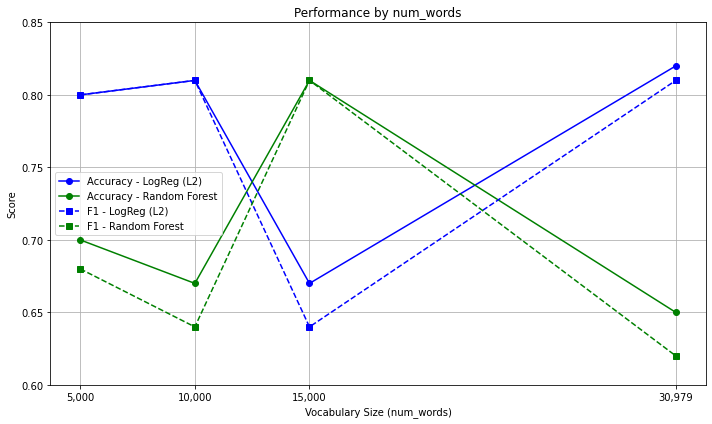

In [116]:
import matplotlib.pyplot as plt

# 데이터 정의
word_counts = [5000, 5000, 10000, 10000, 15000, 15000, 30979, 30979]
accuracy =     [0.80, 0.70, 0.81, 0.67, 0.67, 0.81, 0.82, 0.65]
f1_score =     [0.80, 0.68, 0.81, 0.64, 0.64, 0.81, 0.81, 0.62]

# 모델 분리 (짝수 인덱스: LogReg, 홀수 인덱스: RF)
x_logreg = word_counts[::2]
x_rf = word_counts[1::2]
acc_logreg = accuracy[::2]
acc_rf = accuracy[1::2]
f1_logreg = f1_score[::2]
f1_rf = f1_score[1::2]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(x_logreg, acc_logreg, marker='o', label='Accuracy - LogReg (L2)', color='blue')
plt.plot(x_rf, acc_rf, marker='o', label='Accuracy - Random Forest', color='green')
plt.plot(x_logreg, f1_logreg, marker='s', linestyle='--', label='F1 - LogReg (L2)', color='blue')
plt.plot(x_rf, f1_rf, marker='s', linestyle='--', label='F1 - Random Forest', color='green')

# x축: 명시적 눈금과 라벨
xticks = [5000, 10000, 15000, 30979]
xtick_labels = ['5,000', '10,000', '15,000', '30,979']
plt.xticks(xticks, labels=xtick_labels)

# 그래프 설정
plt.title('Performance by num_words')
plt.xlabel('Vocabulary Size (num_words)')
plt.ylabel('Score')
plt.ylim(0.6, 0.85)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


| 단어 수 (`num_words`) | 모델                 | Accuracy | F1-Score (weighted avg) |
|------------------------|----------------------|----------|--------------------------|
| 5,000                 | Logistic Regression  | 0.80     | 0.80                     |
| 5,000                 | Random Forest         | 0.70     | 0.68                     |
| 10,000                | Logistic Regression  | 0.81     | 0.81                     |
| 10,000                | Random Forest         | 0.67     | 0.64                     |
| 15,000                | Logistic Regression  | 0.81     | 0.81                     |
| 15,000                | Random Forest         | 0.67     | 0.64                     |
| 30,979 (전체 단어 수) | Logistic Regression  | 0.82     | 0.81                     |
| 30,979 (전체 단어 수) | Random Forest         | 0.65     | 0.62                     |


### 전체 인사이트

| 모델                  | penalty/규제      | 벡터화                        | 단어 수 실험값                     |
| ------------------- | --------------- | -------------------------- | ---------------------------- |
| Logistic Regression | L2, `C=default` | `CountVectorizer + TF‑IDF` | 5 k, 10 k, 15 k, all(30 979) |
| Random Forest       | 기본 하이퍼파라미터      | 동일                         | 5 k, 10 k, 15 k, all         |

+ 단어 수에 따른 성능이 두 모델이 반대되는 경향성을 보임
+ Logistic Regression이 Random Forest에 비해 성능의 변동이 적음 L2 규제로 인해 그렇다고 생각됨

| 단어 수 (`num_words`) | 모델                 | Accuracy | F1-Score (weighted avg) |
|------------------------|----------------------|----------|--------------------------|
| 5,000                 | Logistic Regression  | 0.80     | 0.80                     |
| 5,000                 | Random Forest         | 0.70     | 0.68                     |
| 30,979 (전체 단어 수) | Logistic Regression  | 0.82     | 0.81                     |
| 30,979 (전체 단어 수) | Random Forest         | 0.65     | 0.62                     |

+ 극단적인 두 단어 수를 비교해보면 규제의 효과가 있음을 알 수 있음

| 항목             | **Logistic Regression**               | **Random Forest**                                     |
| -------------- | ------------------------------------- | ----------------------------------------------------- |
| **모델 구조**      | 선형 모델 (가중치의 선형 결합)                    | 트리 기반 비선형 모델 (앙상블)                                    |
| **특성 선택 방식**   | 전체 feature를 동시에 사용해 선형 결합             | 각 트리에서 feature를 무작위로 선택해 분할                           |

+ 모델의 특성 상 모든 feature를 동시에 고려하고, 중요하지 않은 단어는 가중치가 거의 0이 됨
고차원에서 중요한 feature 몇 개만 있어도 분류가 가능하여 성능이 높게나옴
+ 트리 기반 모델은 각 노드에서 하나의 feature만 보고 분기함
고차원 희소행렬 환경에서 노이즈 특성에 쉽게 과적화되어 성능이 낮음


#### 두 모델 모두에서 준수한 성능을 보이면서 단어 수도 적은편이라 학습시간이 짧은 단어 수 10,000이 최적으로 판단
#### 차원 수가 많고 희소행렬이 많을 경우 전체 feature를 고려하는 모델이 높은 성능이 기대됨

## 딥러닝 모델 (LSTM)

In [144]:
# 1. 필수 라이브러리 import
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np

# 2. 하이퍼파라미터 설정
num_words = 10000       # 사용할 최대 단어 수
max_len = 200           # 시퀀스 최대 길이
embedding_dim = 128     # 임베딩 차원
batch_size = 128
epochs = 20

# 3. 데이터 로딩
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

# 4. 시퀀스 패딩
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# 5. 클래스 수 자동 계산 후 one-hot 인코딩
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 6. LSTM 모델 정의
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=256),
    Dropout(0.3),
    Dense(units=num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. 콜백 설정 (조기 종료)
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True, verbose=1)

# 8. 모델 학습
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
57/57 [==============================] - 4s 38ms/step - loss: 2.6280 - accuracy: 0.3280 - val_loss: 2.3962 - val_accuracy: 0.3450
Epoch 2/20
57/57 [==============================] - 2s 31ms/step - loss: 2.2108 - accuracy: 0.4205 - val_loss: 1.9403 - val_accuracy: 0.4808
Epoch 3/20
57/57 [==============================] - 2s 31ms/step - loss: 1.7782 - accuracy: 0.5258 - val_loss: 1.7708 - val_accuracy: 0.5331
Epoch 4/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6042 - accuracy: 0.5761 - val_loss: 1.8458 - val_accuracy: 0.5125
Epoch 5/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6232 - accuracy: 0.5630 - val_loss: 1.6130 - val_accuracy: 0.5765
Epoch 6/20
57/57 [==============================] - 2s 31ms/step - loss: 1.3502 - accuracy: 0.6412 - val_loss: 1.5409 - val_accuracy: 0.6088
Epoch 7/20
57/57 [==============================] - 2s 31ms/step - loss: 1.2639 - accuracy: 0.6675 - val_loss: 1.4908 - val_accuracy: 0.6333
Epoch 8/20
57

In [146]:
# 9. 평가 및 분류 리포트 출력
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.32      0.77      0.45       105
           2       0.00      0.00      0.00        20
           3       0.89      0.92      0.90       813
           4       0.81      0.81      0.81       474
           5       0.00      0.00      0.00         5
           6       0.33      0.07      0.12        14
           7       0.00      0.00      0.00         3
           8       0.31      0.53      0.39        38
           9       0.18      0.32      0.23        25
          10       0.10      0.10      0.10        30
          11       0.39      0.54      0.45        83
          12       0.00      0.00      0.00        13
          13       0.16      0.14      0.15        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.41      0.49      0.45        99
 

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


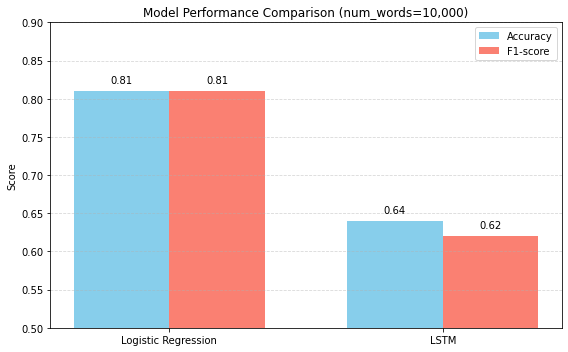

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름
models = ['Logistic Regression', 'LSTM']

# 성능 지표
accuracy = [0.81, 0.64]
f1_score = [0.81, 0.62]

x = np.arange(len(models))  # [0, 1]
width = 0.35  # 막대 너비

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_score, width, label='F1-score', color='salmon')

# 라벨 & 눈금
plt.xticks(x, models)
plt.ylim(0.5, 0.90)
plt.ylabel('Score')
plt.title('Model Performance Comparison (num_words=10,000)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 수치 표시
for i in range(len(models)):
    plt.text(x[i] - width/2, accuracy[i] + 0.01, f"{accuracy[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, f1_score[i] + 0.01, f"{f1_score[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()


+ 머신러닝 모델보다 딥러닝 모델에서 훨씬 낮은 성능을 보임
+ 데이터수가 많은 편이 아니라 그런 것으로 추측됨
+ 딥러닝 모델의 층을 수정하면 더 높은 성능을 보일 여지가 존재함

## 전체 모델 정리
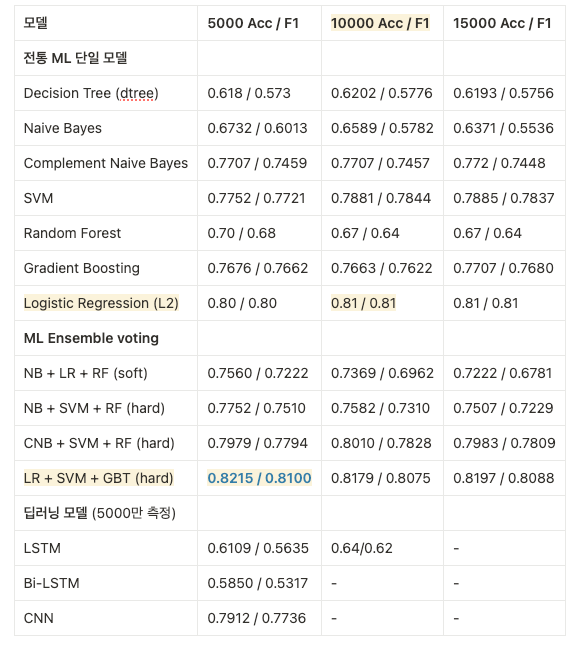

## 회고

데이터의 수를 고려하여 딥러닝보다 머신러닝이 유용할 때도 있다는 생각이 들었다.
저번 DLthon의 경험을 살려서 생각했을 때 데이터 증강을하여 데이터의 수를 늘리고 모델을 변경한다면
고점은 딥러닝이 높은 것이라고 생각된다. (틀릴 수도 있음)
각 모델의 구조적 특성을 파악해두는 것이 (데이터 특징 (차원 수)과 같은 것들을 확인하는 것과 같은)
높은 성능과 효율적인(저비용)의 모델을 만드는 것으로 이어지는 것 같다.

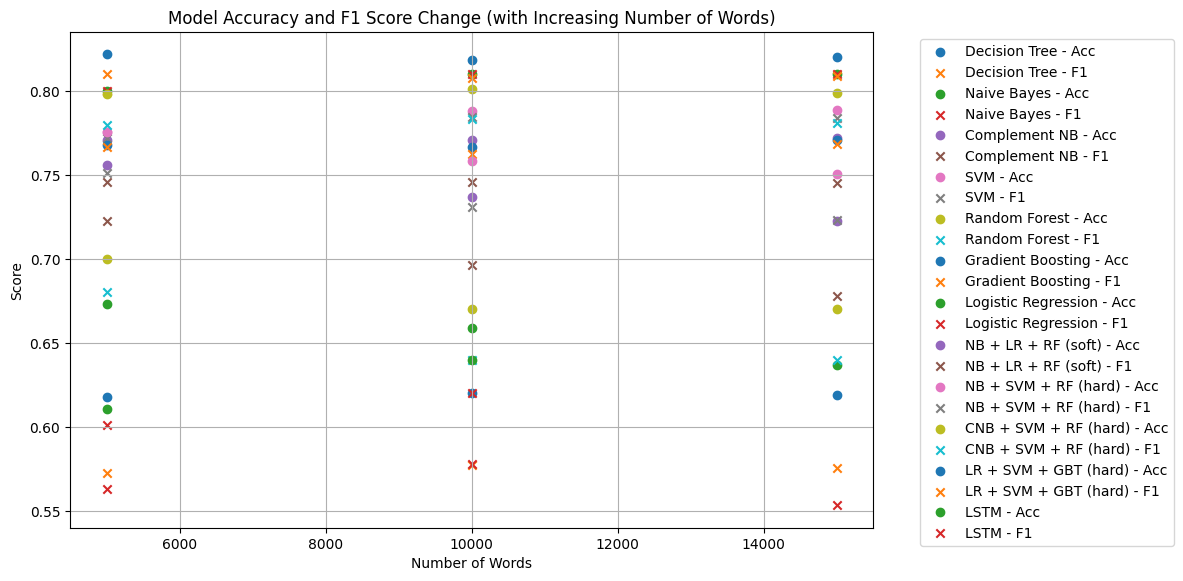

In [2]:
import matplotlib.pyplot as plt

# 모델별 Accuracy/F1 데이터
word_counts = [5000, 10000, 15000]

models = {
    "Decision Tree": [(0.618, 0.573), (0.6202, 0.5776), (0.6193, 0.5756)],
    "Naive Bayes": [(0.6732, 0.6013), (0.6589, 0.5782), (0.6371, 0.5536)],
    "Complement NB": [(0.7707, 0.7459), (0.7707, 0.7457), (0.772, 0.7448)],
    "SVM": [(0.7752, 0.7721), (0.7881, 0.7844), (0.7885, 0.7837)],
    "Random Forest": [(0.70, 0.68), (0.67, 0.64), (0.67, 0.64)],
    "Gradient Boosting": [(0.7676, 0.7662), (0.7663, 0.7622), (0.7707, 0.7680)],
    "Logistic Regression": [(0.80, 0.80), (0.81, 0.81), (0.81, 0.81)],
    "NB + LR + RF (soft)": [(0.7560, 0.7222), (0.7369, 0.6962), (0.7222, 0.6781)],
    "NB + SVM + RF (hard)": [(0.7752, 0.7510), (0.7582, 0.7310), (0.7507, 0.7229)],
    "CNB + SVM + RF (hard)": [(0.7979, 0.7794), (0.8010, 0.7828), (0.7983, 0.7809)],
    "LR + SVM + GBT (hard)": [(0.8215, 0.8100), (0.8179, 0.8075), (0.8197, 0.8088)],
    "LSTM": [(0.6109, 0.5635), (0.64, 0.62), (None, None)],
}

# 그래프 그리기
plt.figure(figsize=(12, 6))
for model, scores in models.items():
    accs = [acc for acc, _ in scores if acc is not None]
    f1s = [f1 for _, f1 in scores if f1 is not None]
    wc = word_counts[:len(accs)]
    plt.scatter(wc, accs, label=f"{model} - Acc", marker='o')
    plt.scatter(wc, f1s, label=f"{model} - F1", marker='x')

plt.title("Model Accuracy and F1 Score Change (with Increasing Number of Words)")
plt.xlabel("Number of Words")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
